In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Train test split

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Putting target variable to y
y = df["Class"]

# Putting feature variables into X
x = df.drop(["Class"], axis = 1)

In [5]:
# Splitting data into train and test set 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

# Feature Scaling

In [6]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [7]:
# Instantiate the Scaler
scaler = StandardScaler()

In [8]:
# Fit the data into scaler and transform
x_train['Amount'] = scaler.fit_transform(x_train[['Amount']])

# Scaling the test set

In [9]:
# Transform the test set
x_test['Amount'] = scaler.transform(x_test[['Amount']])

In [10]:
x_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


# Checking the skewness 

In [11]:
# Listing the columns
cols = x_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

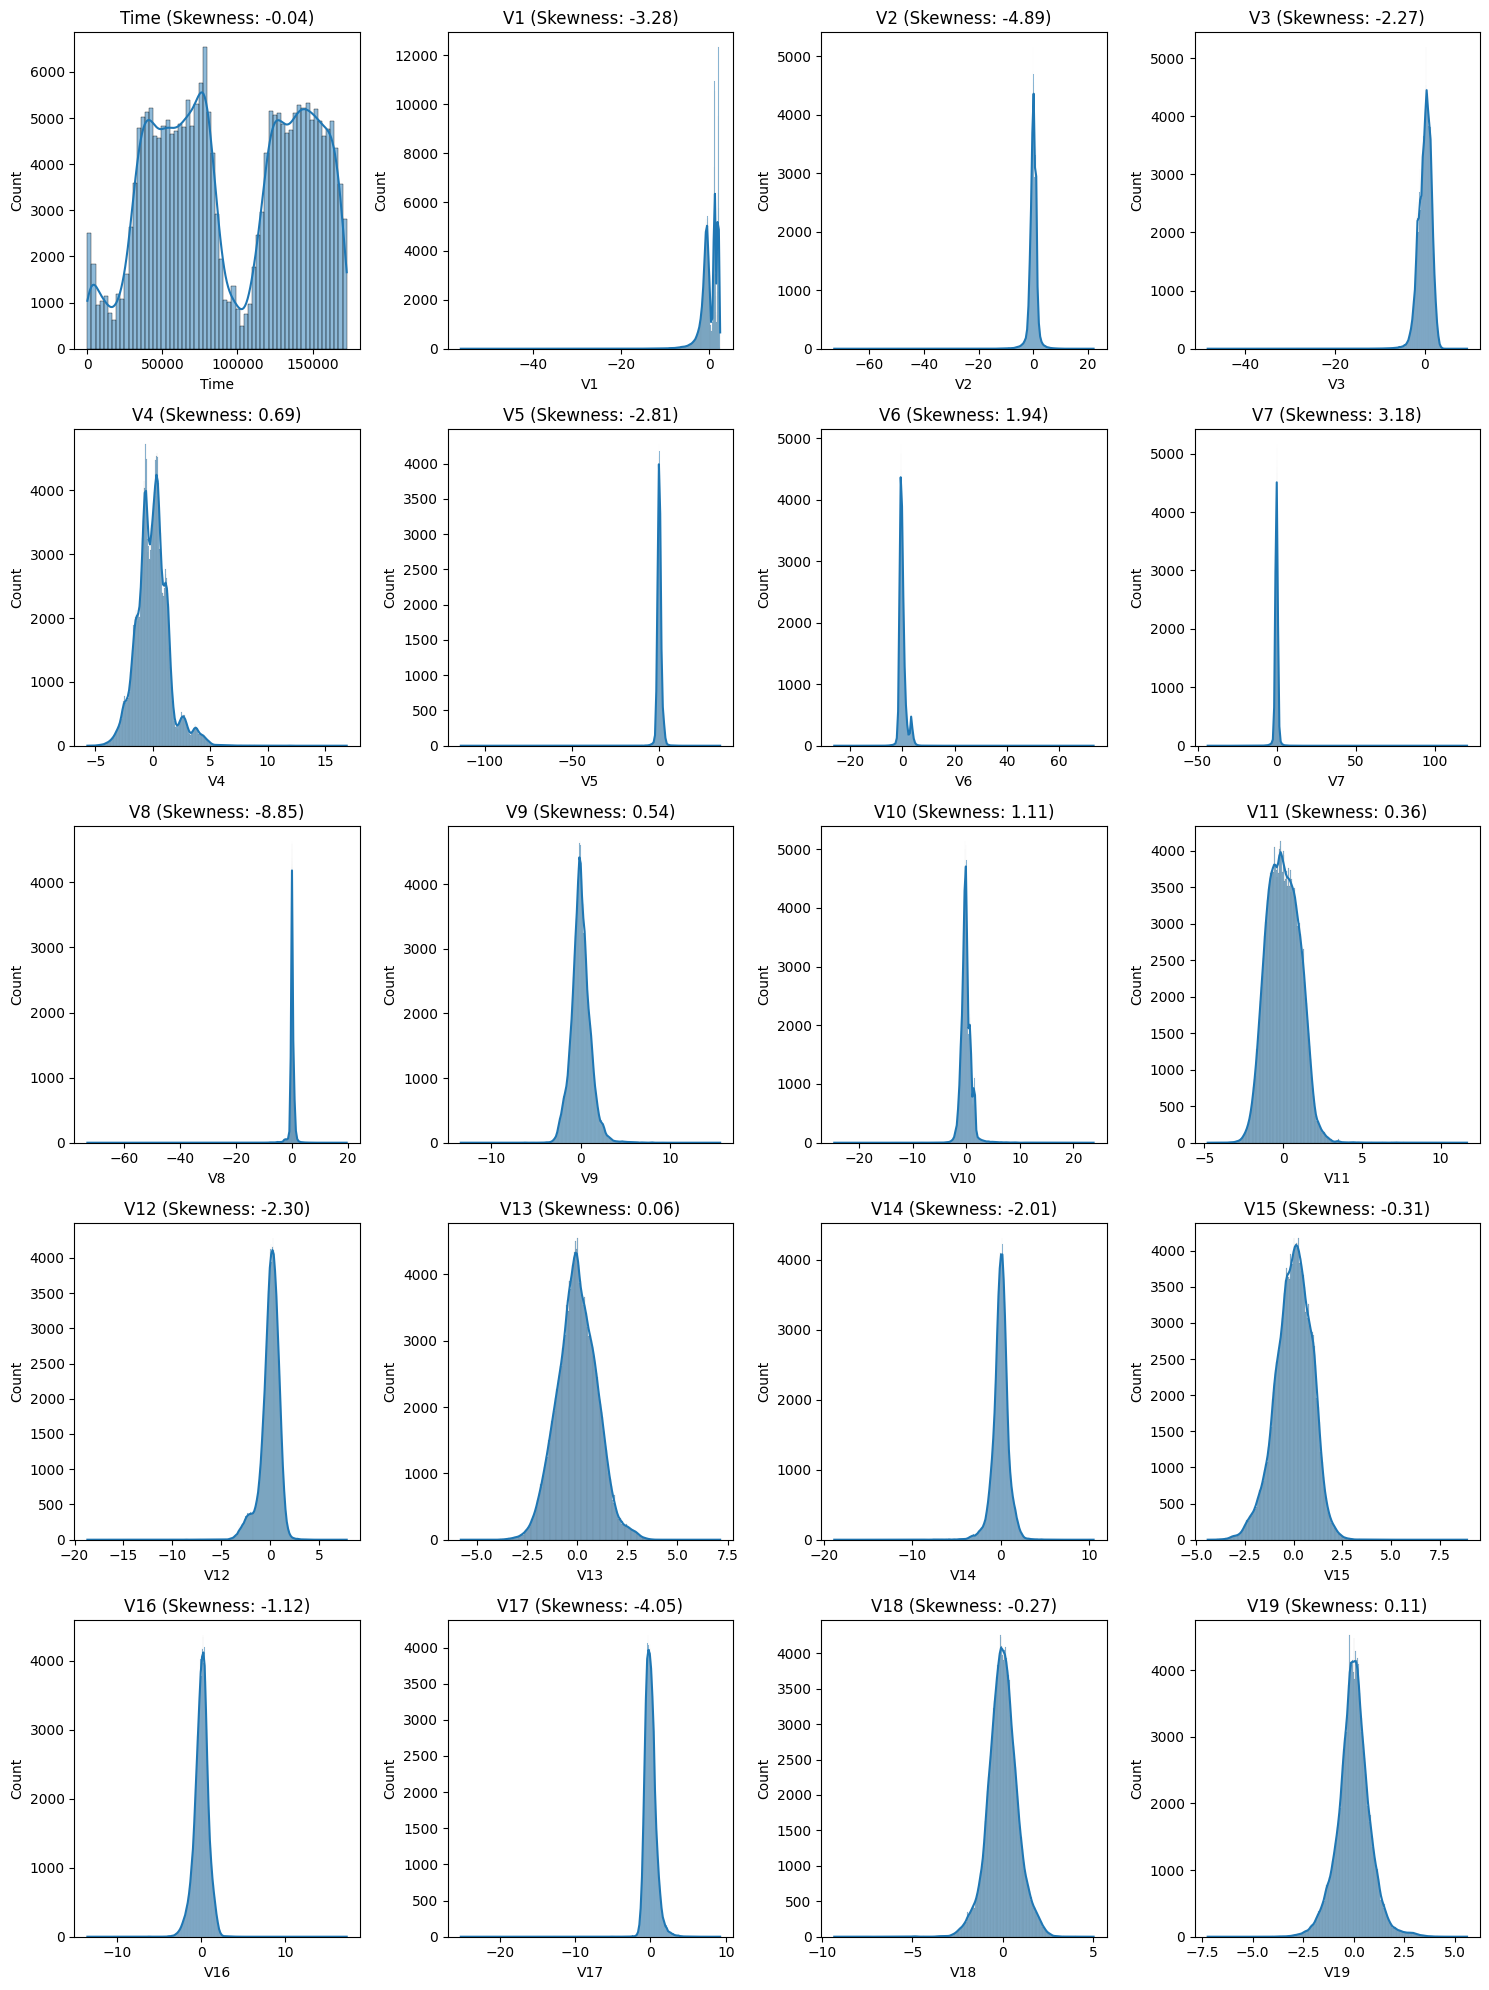

In [12]:
cols_to_plot = cols[:20]  # Limit the number of features for visualization

plt.figure(figsize=(15, 20))  # Adjust the figure size
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(5, 4, i)  # 5 rows, 4 columns per figure
    sns.histplot(x_train[col], kde=True)
    plt.title(f"{col} (Skewness: {x_train[col].skew():.2f})")
    
plt.tight_layout()
plt.show()

# Mitigating Skewness with Power Transformer

In [13]:
# importing Power Transformer
from sklearn.preprocessing import PowerTransformer

In [14]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [15]:
# Fit and transform the PT on training data
x_train[cols] = pt.fit_transform(x_train)

In [16]:
# Transform the test set
x_test[cols] = pt.transform(x_test)

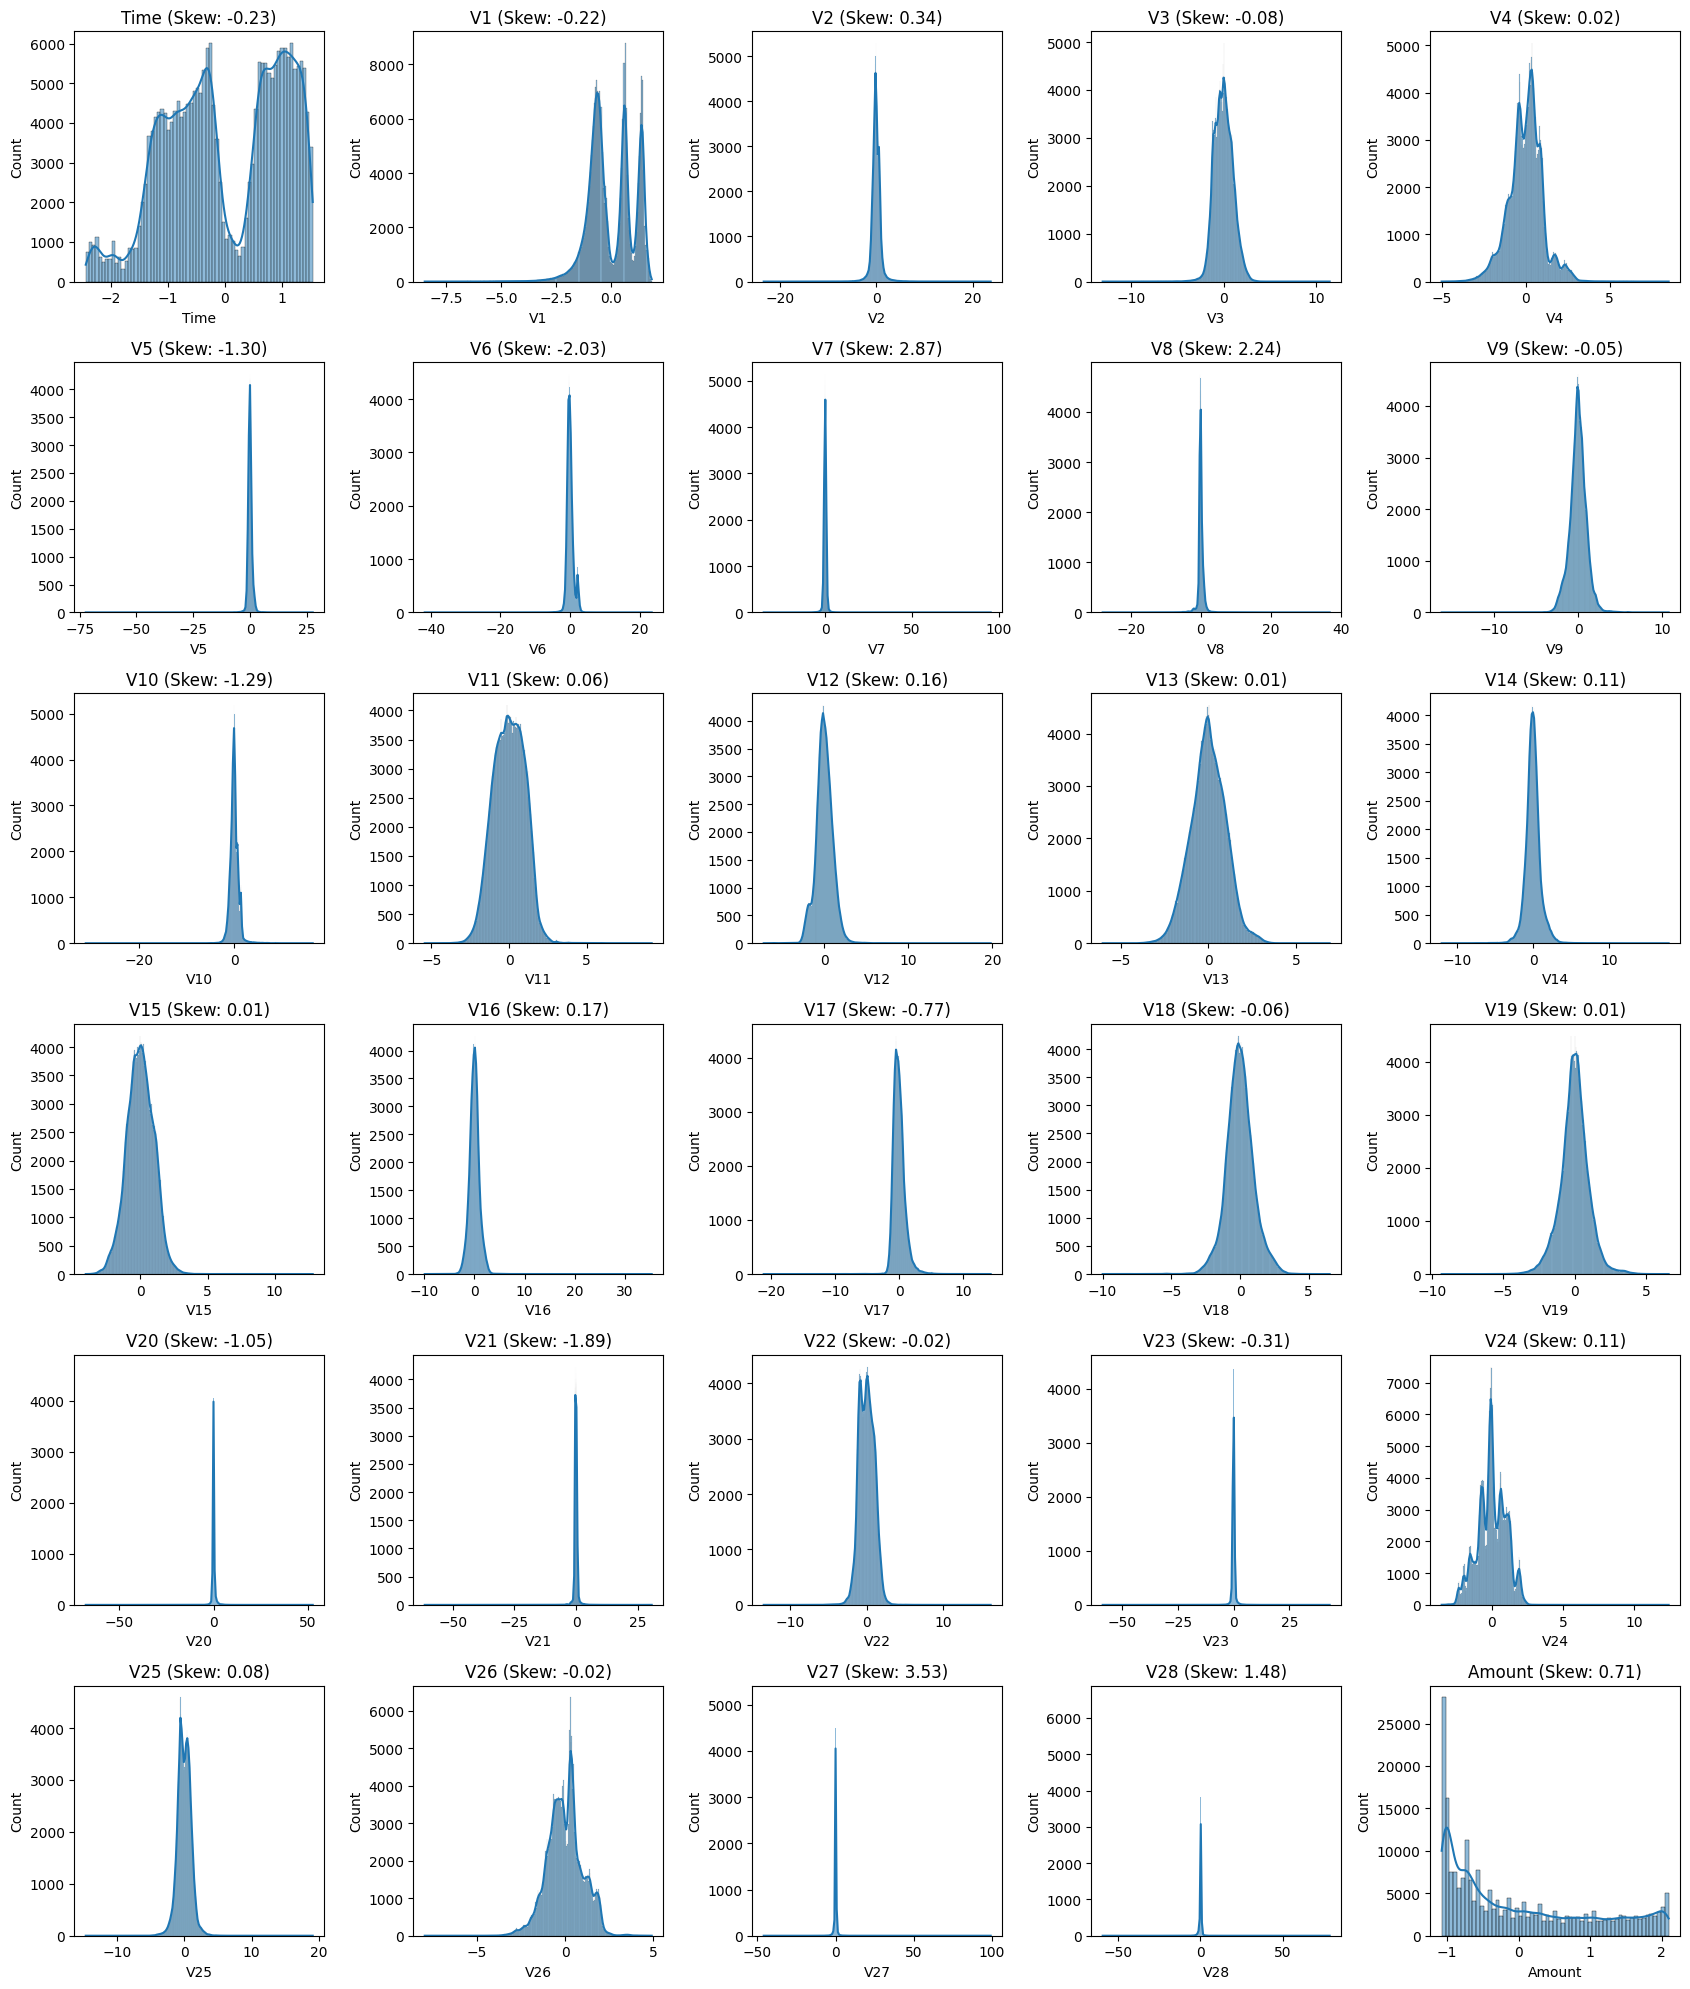

In [17]:
max_plots = min(30, len(cols))  # Show up to 30 plots

plt.figure(figsize=(17, 20))

for i, col in enumerate(cols[:max_plots], 1):  # Enumerate makes tracking easier
    plt.subplot(6, 5, i)  # Create a 6x5 grid (30 plots max)
    sns.histplot(x_train[col], kde=True)  # Faster and supported plot
    skew_value = x_train[col].skew()
    plt.title(f"{col} (Skew: {skew_value:.2f})")
    plt.tight_layout()  # Adjust layout to avoid overlapping plots

plt.show()

# Logistic Regression without SMOTE

In [18]:
# Logistic Regression without SMOTE

from sklearn.linear_model import LogisticRegression

In [19]:
x = df.drop("Class", axis = 1)
y = df["Class"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [21]:

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
log_reg.score(x_test, y_test)*100

99.89993328885924

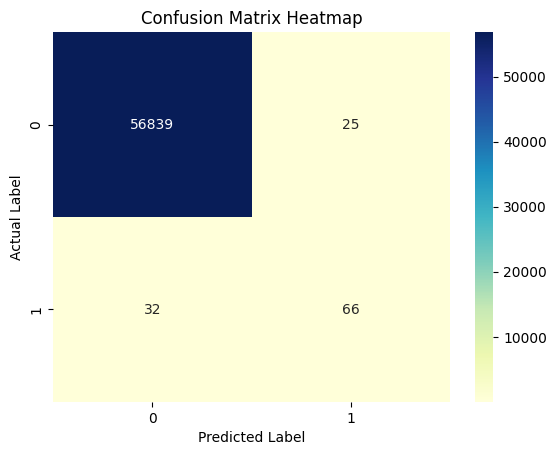

Confusion Matrix:
 [[56839    25]
 [   32    66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.67      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
# Making predictions

y_pred = log_reg.predict(x_test)

# Model Evaluation

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Using SMOTE to balance the dataset 

In [24]:
# using SMOTE to balance the dataset 

from imblearn.over_sampling import SMOTE

In [25]:
sm = SMOTE(random_state = 42)

In [26]:
# Applying SMOTE to generate synthetic sample 

x_train_s, y_train_s = sm.fit_resample(x, y)

C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [27]:
# Class Distribution before resampling

y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [28]:
# Class Distribution after resampling 

y_train_s.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# Logistic Regression with SMOTE 

In [29]:
# Logistic Regression with SMOTE 

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(x_train_s, y_train_s)

LogisticRegression(max_iter=1000, solver='liblinear')

In [30]:
log_reg.score(x_test, y_test)*100

98.4410659738071

In [31]:
# Making predictions

y_pred = log_reg.predict(x_test)

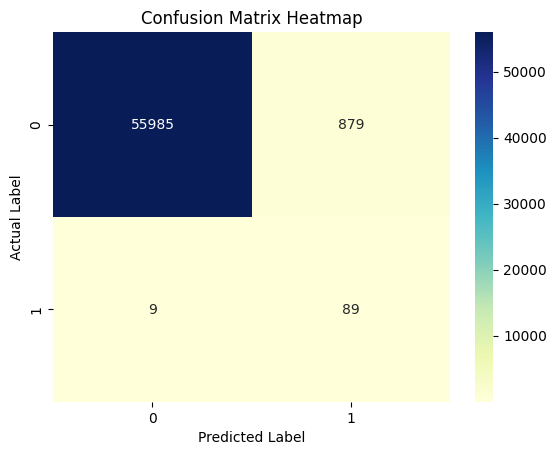

Confusion Matrix:
 [[55985   879]
 [    9    89]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



In [32]:
# Model Evaluation

# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))